<a href="https://colab.research.google.com/github/galudSla/greek-letter-analysis/blob/main/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries

In [16]:
from tqdm import tqdm
import progressbar
import re
import string
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import pandas as pd
from collections import OrderedDict
import matplotlib.pyplot as plt
import csv
from google.colab import files
%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


the upload part till the preprocessing is skipped due to the very large dataset size (over 80GB) and has been done offline, the code is here for reference and the results and preprocessing is done with the el_unique.txt which holds all the unique words of the dataset.

In [ ]:
uploaded = files.upload()

In [ ]:
tone_dict = {
    'ά': 'α',
    'έ': 'ε',
    'ύ': 'υ',
    'ώ': 'ω',
    'ή': 'η',
    'ί': 'ι',
    'ό': 'ο',
    'ϊ': 'ι',
    'ΐ': 'ι'
}

Append text to string in chunks.Lower case the loaded string, punctuation and number in string removal. Replacement of toned letters with the same without the tone.

In [ ]:
words = {}
count_all = 0
with open("E:\\Downloads\\el\\el.txt", 'r', encoding='utf-8') as f:
    for chunk in tqdm(iter(lambda: f.read(16777216), ''), total= 3015):

        for i in string.punctuation+'0123456789':
            chunk = chunk.replace(i, '')
        for key,val in tone_dict.items():
            chunk = chunk.replace(key, val)

        chunk = chunk.lower()
        temp = word_tokenize(chunk)
        count_all += len(temp)

        for word in temp:
            if word not in words.keys():
                words[word] = 1
            else:
                words[word] += 1

In [ ]:
with open('el_unique.txt', 'w', encoding='utf-8') as f:
    write = csv.writer(f)
    write.writerow(words.keys())

with open('el_frequency', 'w', encoding='utf-8') as f:
    write = csv.writer(f)
    write.writerow(words.values())

preprocessing

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
with open('/content/drive/MyDrive/Colab Notebooks/Greek Letter Analysis /el_unique.txt', encoding='utf-8') as f:
    words = f.read().rstrip('\n')

In [12]:
words = word_tokenize(words)
words = list(set(words))
words = [i for i in words if len(i)>2]

In [20]:
bar = progressbar.ProgressBar(maxval=len(words)).start()
greek_pattern = re.compile(r'^[α-ω]{1,24}$')
clean_words = []
for i,word in enumerate(words):
    if greek_pattern.match(word):
        word = word.replace("ς", "σ")
        clean_words.append(word.strip())
    bar.update(i+1)

 99% (13846389 of 13856197) |########### | Elapsed Time: 0:00:43 ETA:   0:00:00

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/Greek Letter Analysis/final.txt', 'w', encoding='utf-8') as f:
    write = csv.writer(f)
    write.writerow(clean_words)

In [ ]:
clean_words

dictionary that holds the number of each letter appearence

In [30]:
bar = progressbar.ProgressBar(maxval=len(clean_words)).start()
letter_dict = {}
total_letters = 0
for i in range(len(clean_words)):
    for j in clean_words[i]:
        if j not in letter_dict.keys():
            letter_dict[j] = 1
            total_letters += 1
        else:
            letter_dict[j] += 1
            total_letters += 1
    bar.update(i+1)

letter_dict = dict(sorted(letter_dict.items()))

100% (8226953 of 8226953) |##############| Elapsed Time: 0:01:12 ETA:  00:00:00

In [31]:
letter_dict

{'α': 12253621,
 'β': 962176,
 'γ': 2004014,
 'δ': 1798160,
 'ε': 8285464,
 'ζ': 667388,
 'η': 3714873,
 'θ': 1041985,
 'ι': 9047137,
 'κ': 4484074,
 'λ': 3674313,
 'μ': 3880425,
 'ν': 5666727,
 'ξ': 516879,
 'ο': 9595319,
 'π': 3777174,
 'ρ': 5189820,
 'σ': 7597699,
 'τ': 6325292,
 'υ': 4388487,
 'φ': 1176011,
 'χ': 1332953,
 'ψ': 224459,
 'ω': 2174536}

Bar plot for letter appearence

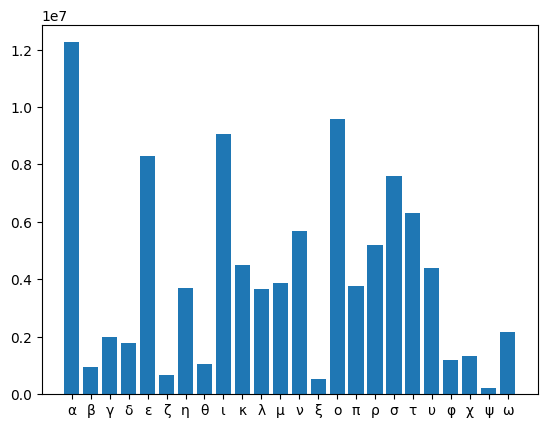

In [32]:
names = list(letter_dict.keys())
values = list(letter_dict.values())

plt.bar(range(len(letter_dict)), values, tick_label=names)
plt.show()

Letter appearence percentage calculation and dictionary mapping

In [33]:
letter_percentage_dic = {}
for key in letter_dict:
    letter_percentage_dic[key] = round(letter_dict[key]/total_letters*100, 2)

Dictionary with the appearence of the letter that follows another letter

In [35]:
dic_letter_count = {i: {} for i in letter_dict.keys()}
for key in dic_letter_count.keys():
    dic_letter_count[key] = {i: 0 for i in dic_letter_count.keys()}

for i in letter_dict.keys():
    for x in clean_words:
        for y in range(len(x)-1):
            if x[y] == i:
                dic_letter_count[i][x[y+1]] += 1

Letter that follows dictionary to dataDrame and bar plot for each letter.

<ipython-input-36-bbce6f625c83>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


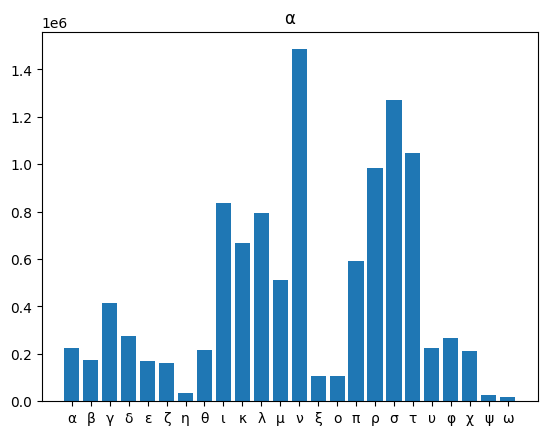

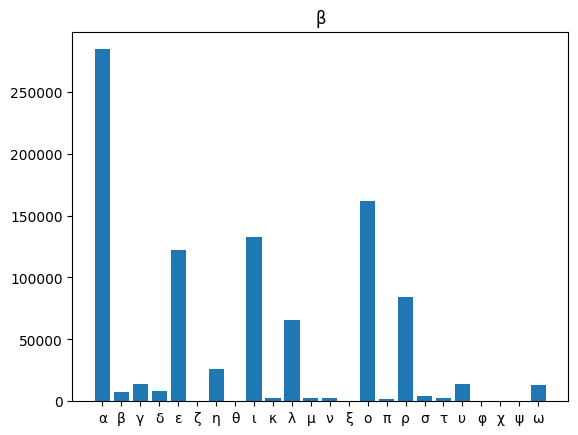

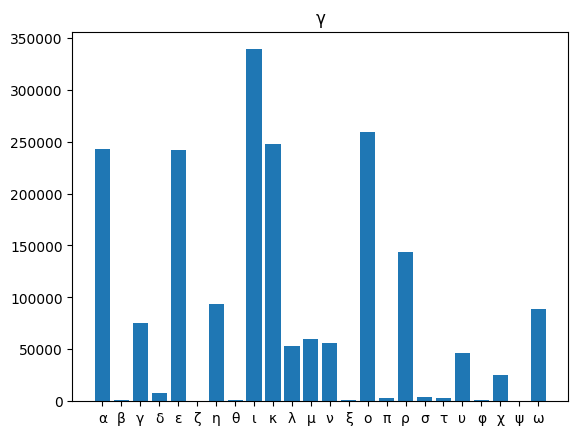

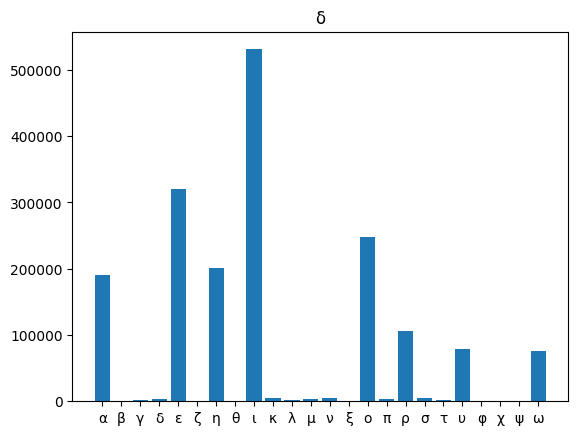

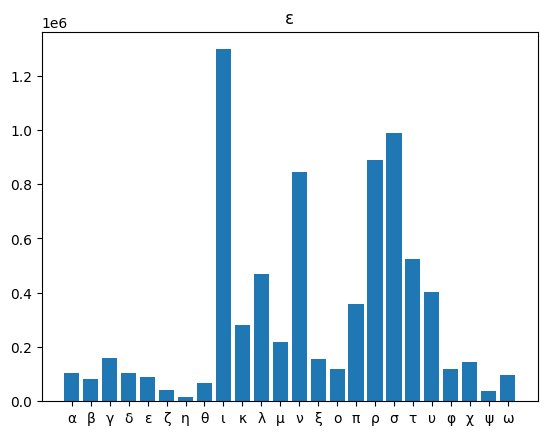

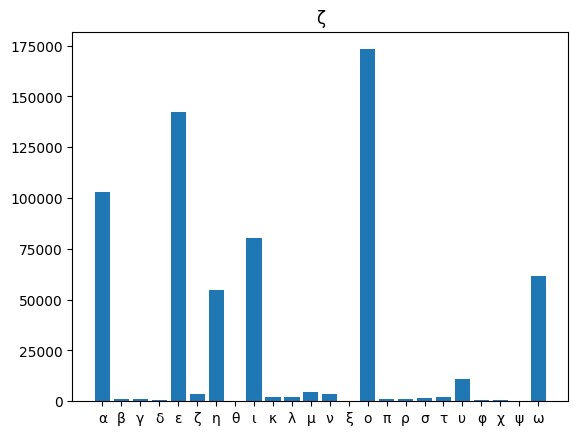

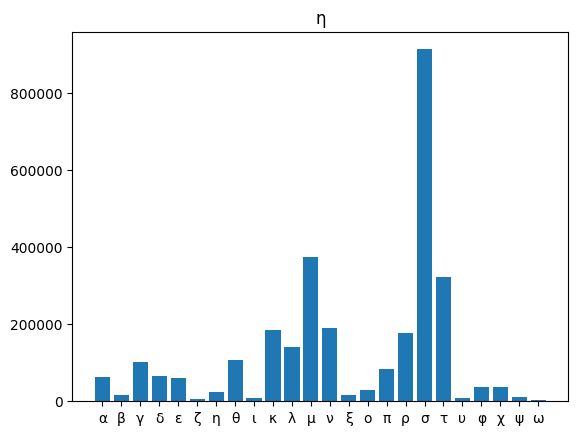

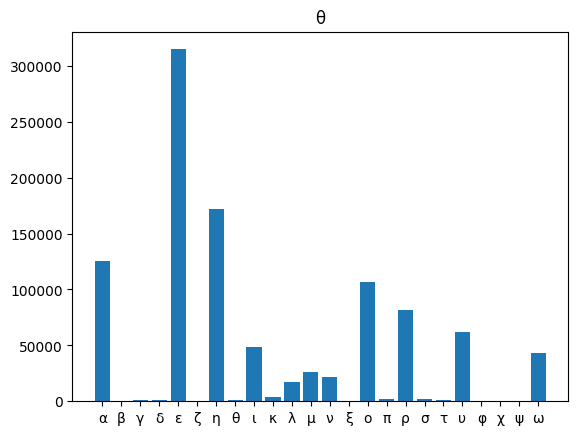

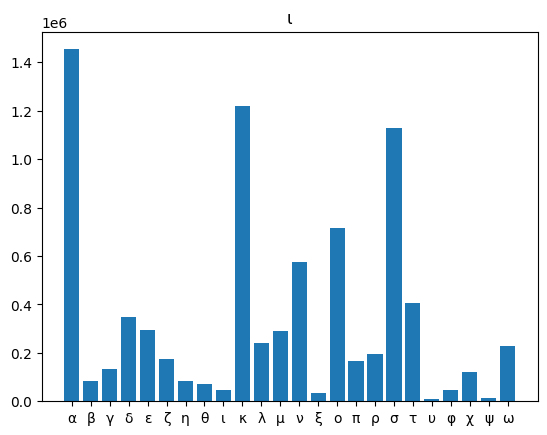

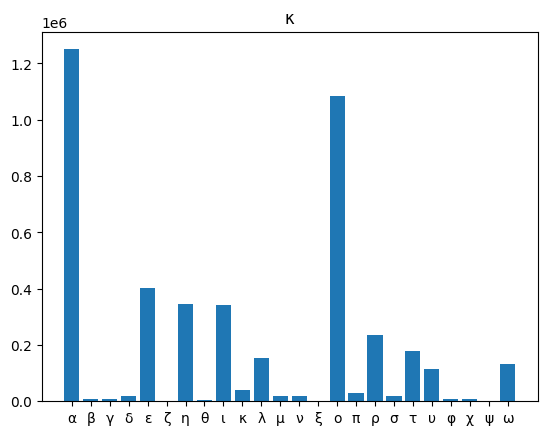

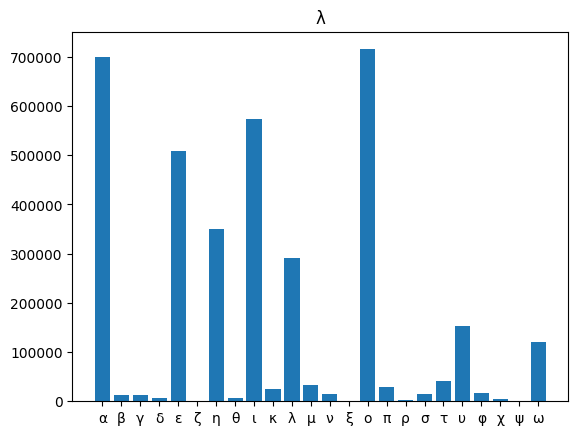

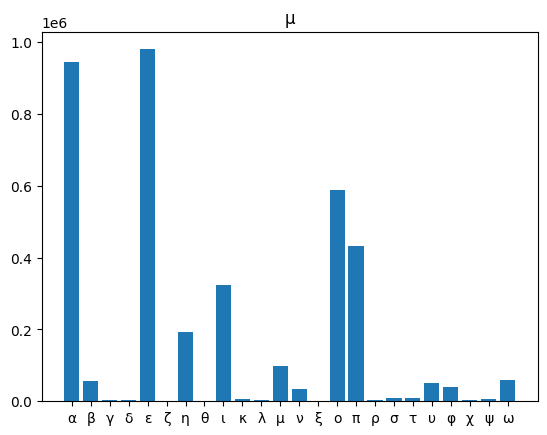

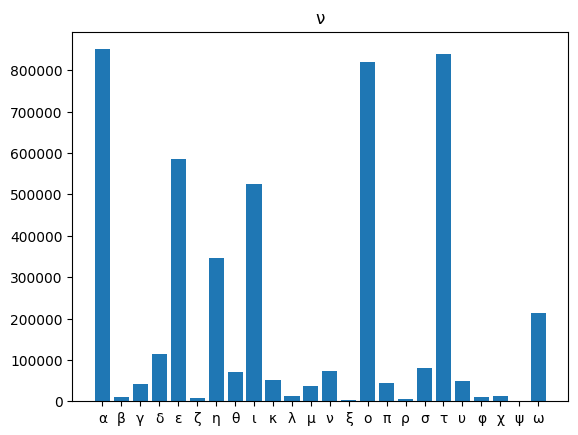

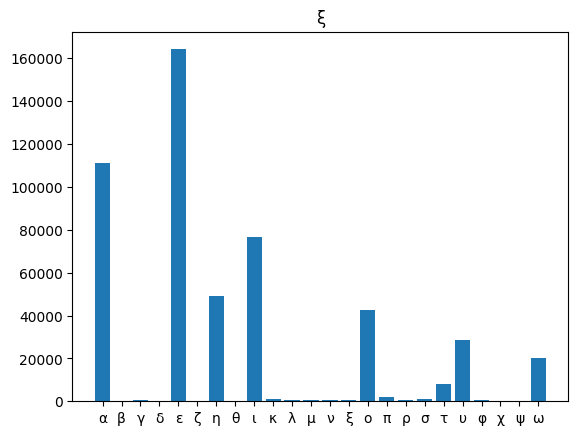

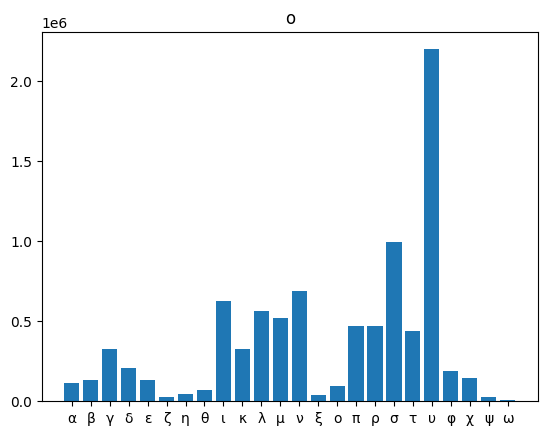

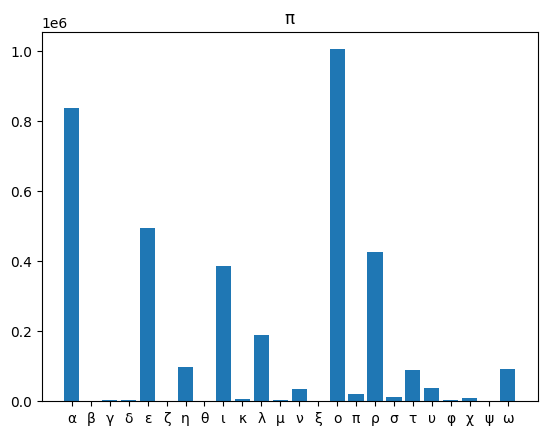

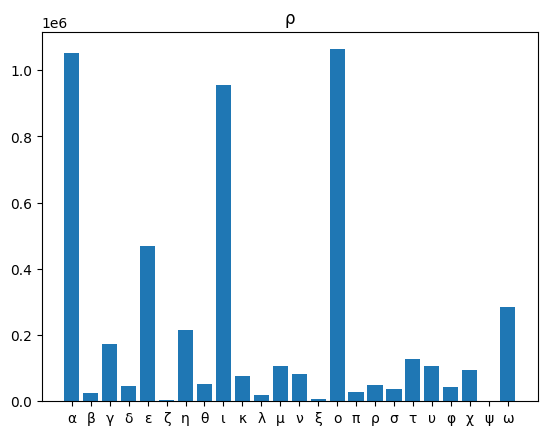

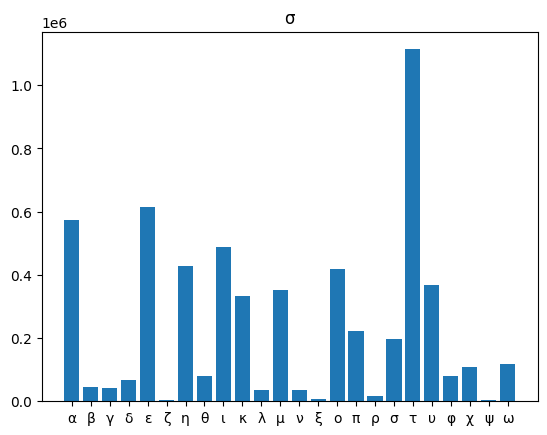

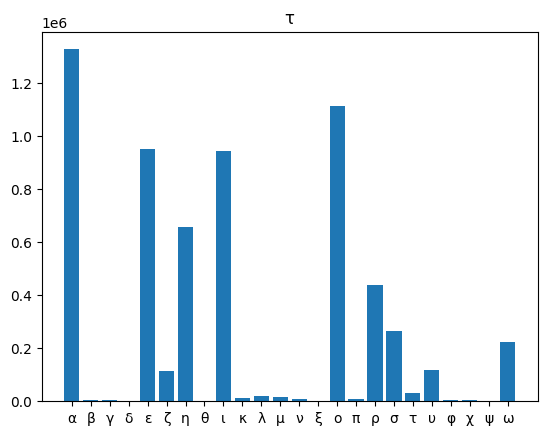

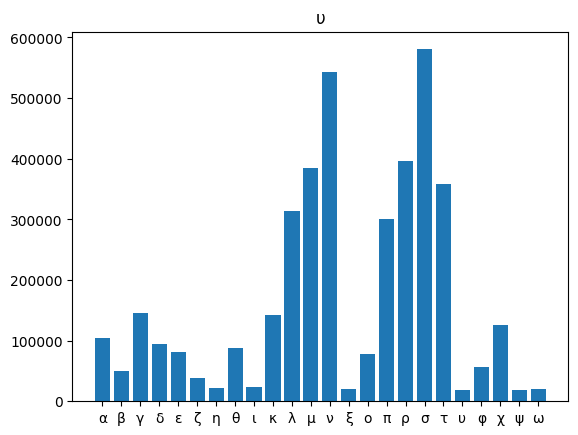

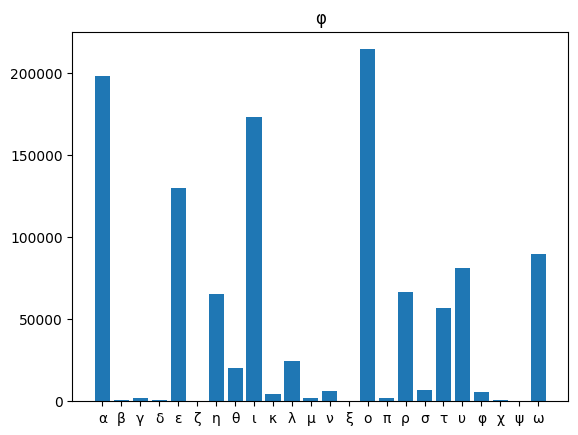

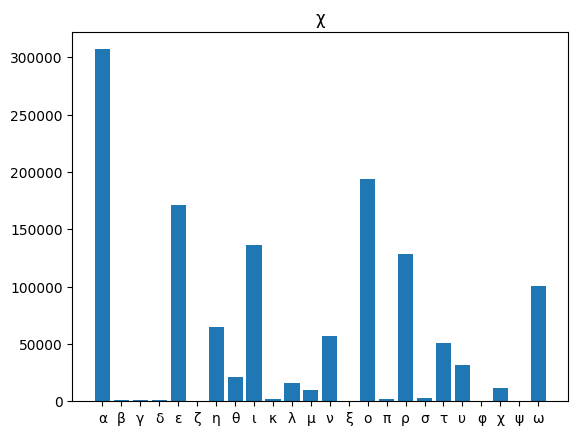

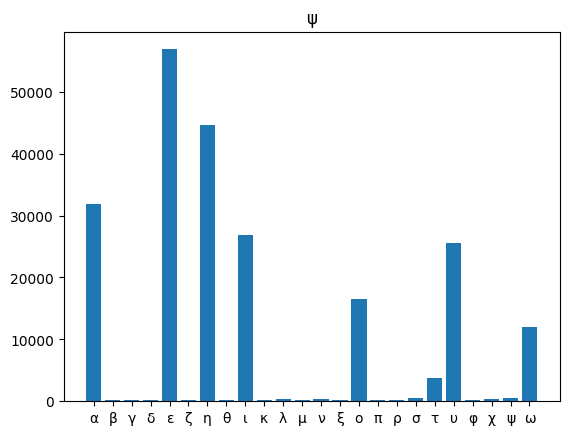

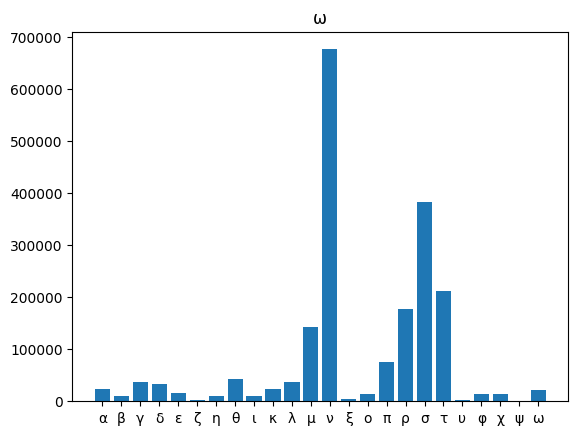

In [36]:
df = pd.DataFrame.from_dict(dic_letter_count, orient='index')
for row in df.index:
    plt.figure()
    plt.title(row)
    plt.bar(df.columns, df.loc[row])